# 🧪 Wine Quality Classification Project

## 📌 Project Overview
This project focuses on classifying the quality of red wine samples based on their physicochemical attributes. The goal is to predict the `quality` score of a wine sample (ranging from 3 to 8) using machine learning models.

We will train and evaluate the following classifiers:
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Artificial Neural Network (ANN)


## 🎯 Objectives
- Understand the structure of the dataset through Exploratory Data Analysis (EDA)
- Preprocess and prepare the data for modeling
- Train and evaluate three classification models: SVM, KNN, and ANN
- Compare performance metrics for each model
- Interpret the results and draw final conclusions


## 📂 Dataset Description
The dataset consists of 1143 red wine samples. Each sample is described by 11 physicochemical tests (e.g., acidity, pH, alcohol level) and one target label: `quality`.

**Input Features:**
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

**Target:**
- `quality` (integer from 3 to 8)


## 🛠️ Tools and Libraries
This project is implemented in Python using the following libraries:
- `pandas`, `numpy` for data handling
- `matplotlib`, `seaborn` for visualization
- `scikit-learn` for SVM and KNN
- `tensorflow.keras` for ANN modeling (optional for neural networks)

## 🧩 Project Workflow
1. Load and explore the dataset (EDA)
2. Preprocess the data (scaling, train-test split)
3. Train the classification models
   - Support Vector Machine (SVM)
   - K-Nearest Neighbors (KNN)
   - Artificial Neural Network (ANN)
4. Evaluate and compare the model performance
5. Present conclusions

---

Let's begin with **Step 1: Load and Explore the Dataset** 🚀

## 🔍 Step 1: Load and Explore the Dataset

### What we do in this step:
In this step, we import the red wine dataset and perform exploratory data analysis (EDA) to understand the data's structure and quality. This includes checking for missing values, feature distributions, and class distribution of the `quality` variable.

### Why this matters:
EDA helps us identify potential data issues (e.g., null values, imbalance in classes, skewed features) before we proceed with modeling. It also provides early insights into which features might be useful for predicting wine quality.

We will also visualize:
- The distribution of the target variable (`quality`)
- The correlation between features

In [ ]:
# Step 1: Load and Explore the Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv("WineQT.csv")
df.drop(columns=['Id'], inplace=True)

# Preview the first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Check basic info
print("\nData Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Dataset Structure**:
   - The dataset contains 1,143 entries and 12 features (11 input features + 1 target: `quality`).
   - All features are numeric.
   - There are no missing values in the dataset, which makes it ready for preprocessing without imputation.

In [ ]:
# Describe numerical features
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000        

In [ ]:
# Check class distribution of target variable
print("\nTarget Variable Distribution:")
df['quality'].value_counts().sort_index()


Target Variable Distribution:


,count
quality,
3,6
4,33
5,483
6,462
7,143
8,16


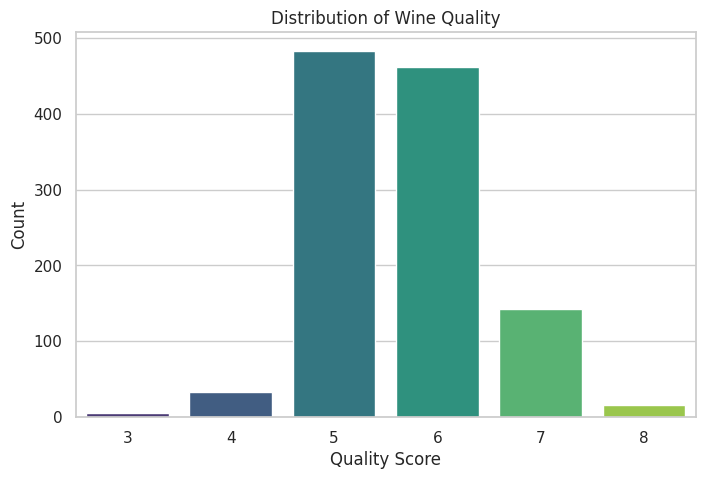

In [ ]:
# Visualize the distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

**Target Variable (`quality`)**:
   - The `quality` score ranges from 3 to 8.
   - Most wines are rated 5, 6, or 7, with very few samples rated 3 or 8.
   - This indicates a **class imbalance**, which may affect model performance and should be considered later (e.g., with stratified sampling or class weighting).

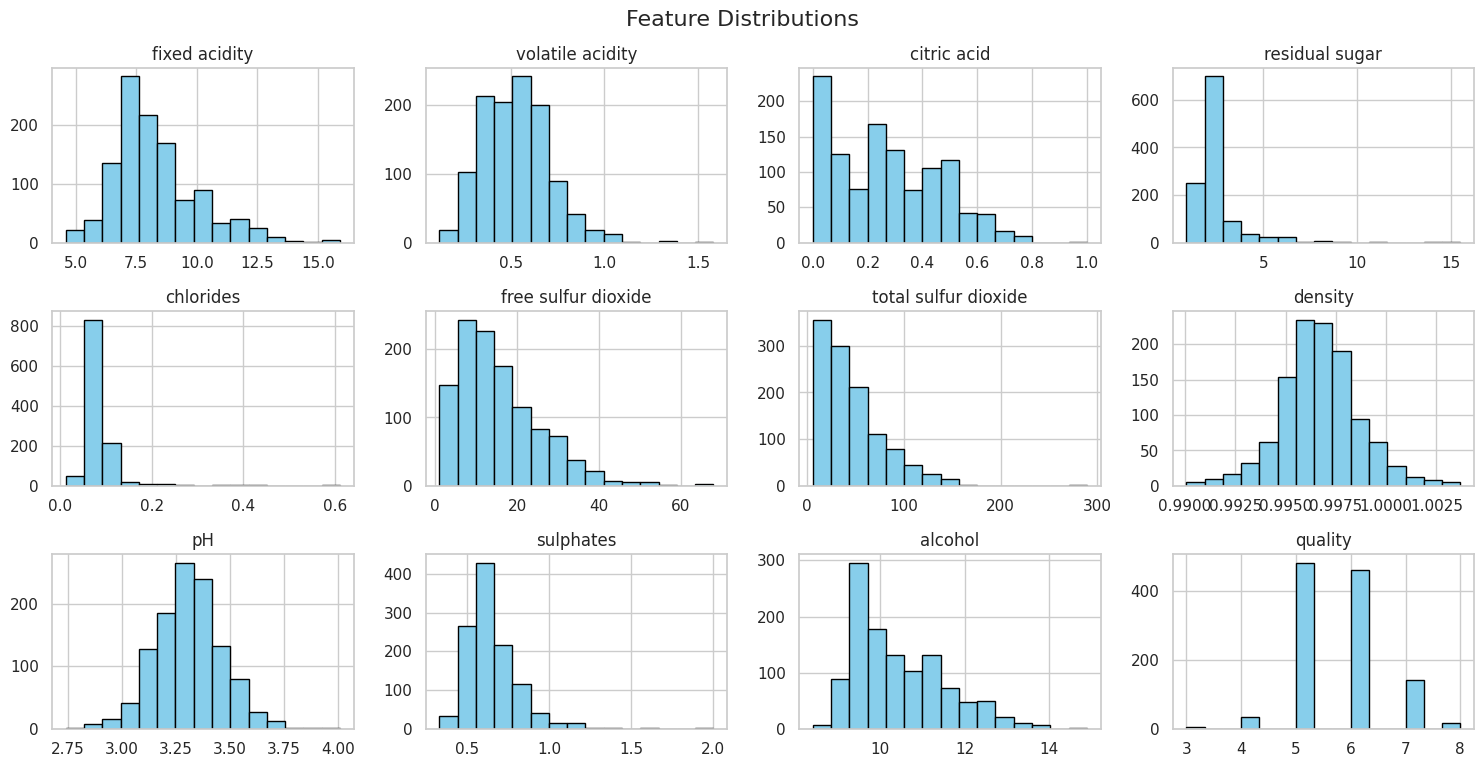

In [ ]:
# Plot histogram untuk setiap fitur numerik
df.hist(bins=15, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

**Feature Distributions**:
   - Features like `residual sugar`, `chlorides`, and `alcohol` exhibit **right-skewed distributions**.
   - Since models like KNN and SVM are sensitive to feature scales and ranges, **normalization will be applied**.


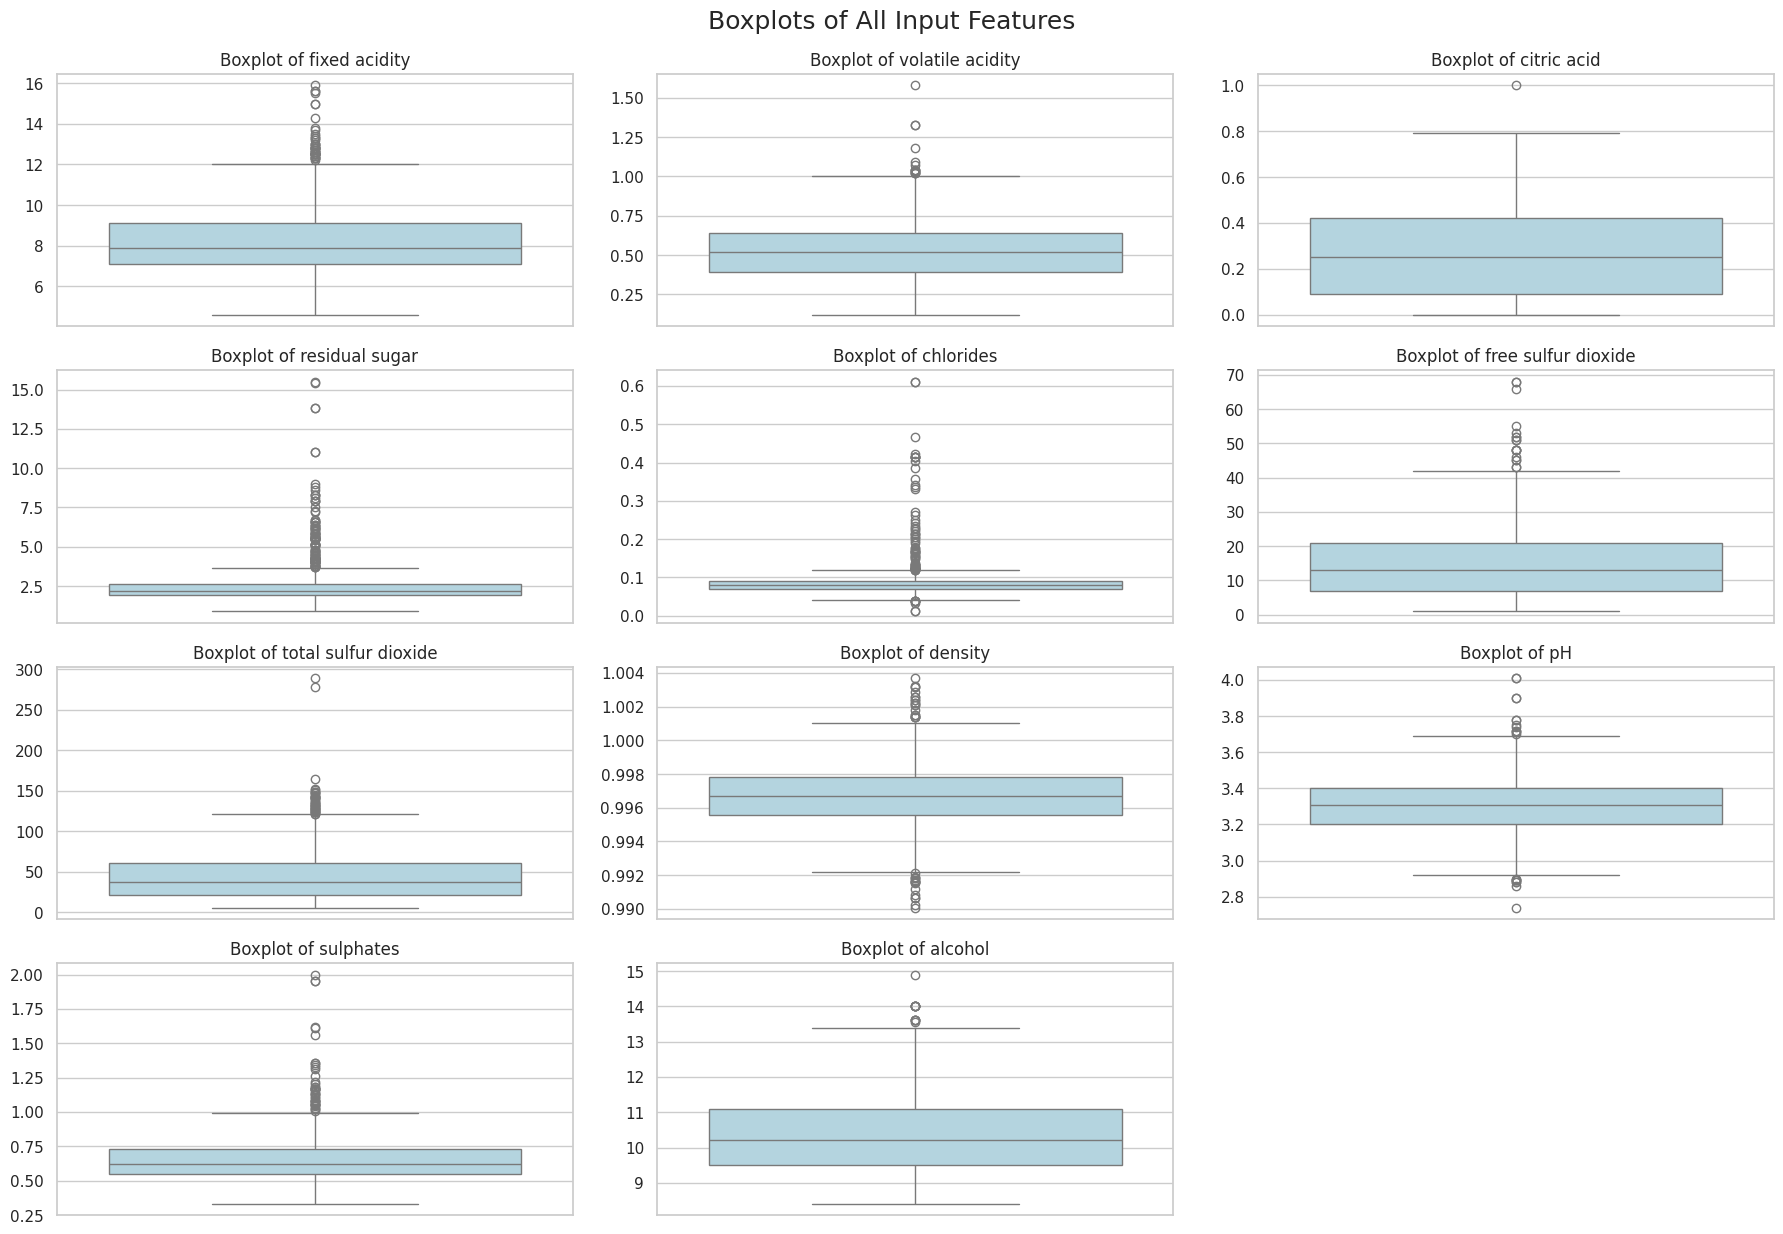

In [ ]:
# Pisahkan fitur dari target
features = df.drop(columns=['quality'])

# Plot histogram untuk setiap fitur numerik
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(features.columns):
    sns.boxplot(y=features[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hapus subplot kosong jika jumlah fitur < slot grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots of All Input Features", fontsize=18, y=1.02)
plt.show()


**Outlier Detection (Boxplots)**:
   - Several features have potential outliers, notably `residual sugar`, `chlorides`, and `total sulfur dioxide`.
   - These are typical in real-world datasets. We will not remove them but monitor their impact on model performance.


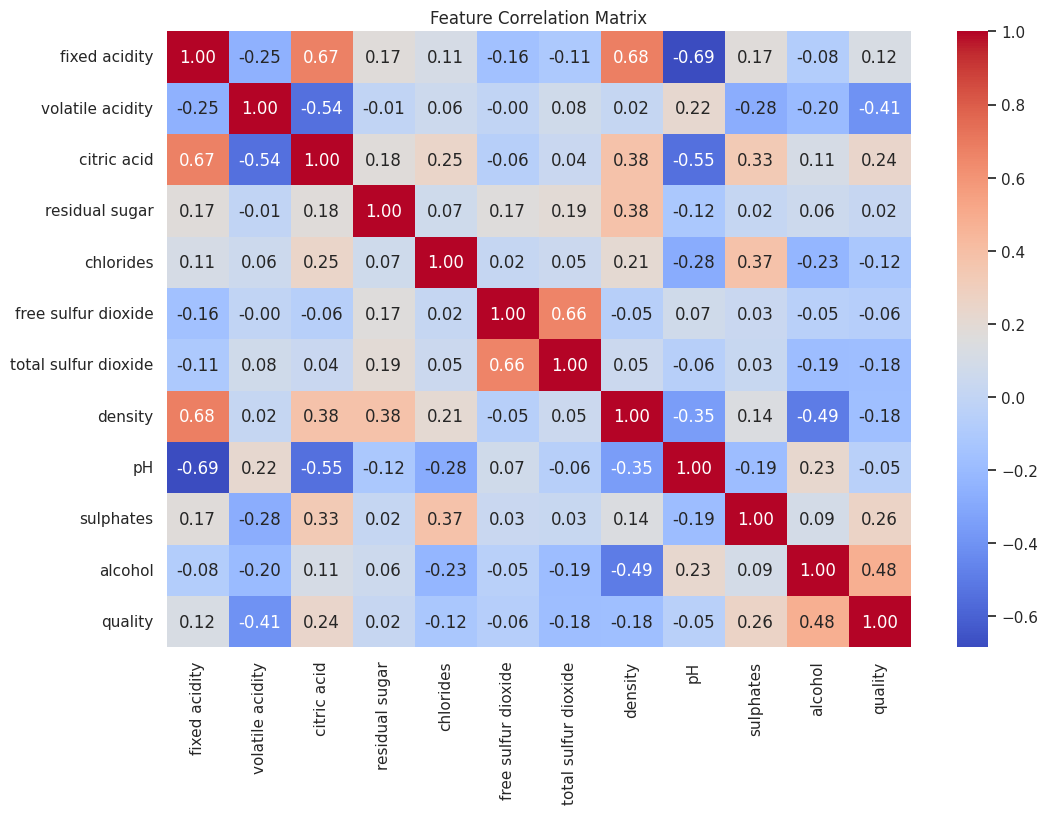

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

The **correlation heatmap** shows that:
- `alcohol` has the strongest **positive correlation** with wine quality (~0.48), suggesting higher alcohol content may indicate better wine.
- `volatile acidity` has a moderate **negative correlation** (~ -0.39) with quality, meaning higher acidity tends to lower perceived quality.
- Other features like `citric acid`, `sulphates`, and `density` show mild correlation (positive or negative) with quality.
- Some features, like `residual sugar`, have almost no correlation with quality.


### ✅ Conclusion:
The dataset is well-structured and clean. There is a slight class imbalance, skewed distributions, and some outliers. Before modeling, we will apply **feature scaling** and **split the data** into training and testing sets to ensure robust evaluation.

## ⚙️ Step 2: Data Preprocessing

### What we do in this step:
In this step, we prepare the data for modeling by:
- Separating the features (X) and target (y)
- Applying **feature scaling** using StandardScaler
- Splitting the dataset into training and testing sets using **stratified sampling** to maintain class distribution

### Why this matters:
Feature scaling is important for models like KNN and SVM that are sensitive to the scale of data. Stratified splitting ensures that each quality class is proportionally represented in both training and test sets, preventing skewed performance results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Stratified train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Cek distribusi kelas di train dan test
print("Train set class distribution:\n", y_train.value_counts().sort_index())
print("\nTest set class distribution:\n", y_test.value_counts().sort_index())

Train set class distribution:
 quality
3      5
4     26
5    386
6    370
7    114
8     13
Name: count, dtype: int64

Test set class distribution:
 quality
3     1
4     7
5    97
6    92
7    29
8     3
Name: count, dtype: int64


## 🤖 Step 3: Model Training and Evaluation

### What we do in this step:
We will train and evaluate three different classification models to predict wine quality based on physicochemical features:
1. **Support Vector Machine (SVM)**
2. **K-Nearest Neighbors (KNN)**
3. **Artificial Neural Network (ANN)**

Each model will be trained and tested under two conditions:
- **3.1 Stratified Split Only**: Using the original class distribution
- **3.2 SMOTE Oversampling**: Using balanced training data with synthetic samples


### Why this matters:
Each model has different strengths:
- **SVM** performs well in high-dimensional spaces and is sensitive to scaling.
- **KNN** is simple and relies on distance, which makes it sensitive to feature scale and outliers.
- **ANN** can learn complex nonlinear relationships but requires proper tuning and sufficient data.

This comparison will help us understand how each model handles imbalanced multi-class classification, and whether SMOTE improves performance.

### 📊 3.1 Modeling with Stratified Sampling Only

In this section, we use the original training and testing sets created from the stratified split (Step 2) without applying any balancing techniques.

Each model (SVM, KNN, ANN) will be trained on the raw training set and evaluated using:
- Accuracy
- Precision, Recall, F1-Score (macro average)
- Confusion Matrix

This will serve as our **baseline performance** for comparison with the SMOTE-enhanced models in the next step.

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np


In [ ]:
# SVM Model
print("\n===== SVM Classifier =====")
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


===== SVM Classifier =====
Accuracy: 0.6637554585152838

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.79      0.76        97
           6       0.61      0.72      0.66        92
           7       0.64      0.31      0.42        29
           8       0.00      0.00      0.00         3

    accuracy                           0.66       229
   macro avg       0.33      0.30      0.31       229
weighted avg       0.63      0.66      0.64       229

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 77 20  0  0]
 [ 0  0 22 66  4  0]
 [ 0  0  2 18  9  0]
 [ 0  0  0  2  1  0]]


In [ ]:
# KNN Model
print("\n===== KNN Classifier =====")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



===== KNN Classifier =====
Accuracy: 0.5676855895196506

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.66      0.66        97
           6       0.53      0.61      0.57        92
           7       0.40      0.34      0.37        29
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.27      0.27      0.27       229
weighted avg       0.55      0.57      0.56       229

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  2  5  0  0]
 [ 0  1 64 28  4  0]
 [ 0  1 25 56 10  0]
 [ 0  0  3 16 10  0]
 [ 0  0  1  1  1  0]]


In [ ]:
# ANN Model
print("\n===== ANN Classifier =====")

# One-hot encode target for ANN
y_train_ann = to_categorical(y_train)
y_test_ann = to_categorical(y_test)

# Get number of features and classes
n_features = X_train.shape[1]
n_classes = y_train_ann.shape[1]

# Build model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(n_features,)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(n_classes, activation='softmax'))

# Compile and train
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train_ann, epochs=50, batch_size=16, verbose=0)

# Evaluate
y_pred_ann = ann_model.predict(X_test)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_ann_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann_classes))


===== ANN Classifier =====
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.6550218340611353

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.76      0.74        97
           6       0.62      0.70      0.65        92
           7       0.57      0.41      0.48        29
           8       0.00      0.00      0.00         3

    accuracy                           0.66       229
   macro avg       0.32      0.31      0.31       229
weighted avg       0.62      0.66      0.64       229

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 74 21  2  0]
 [ 0  0 22 64  6  0]
 [ 0  0  1 15 12  1]
 [ 0  0  0  2  1  0]]


#### 📈 Evaluation: 3.1 Stratified Sampling Only

Based on the performance of the three models trained on the original stratified training data, we observed the following:

##### 🔹 Support Vector Machine (SVM)
- **Accuracy**: 66.4%
- **Macro F1-Score**: ~0.31
- **Observations**:
  - Performed well on majority classes (`5`, `6`)
  - Poor or no recognition of rare classes (`3`, `4`, `8`)
  - Moderate balance between precision and recall for class `6`

---

##### 🔹 K-Nearest Neighbors (KNN)
- **Accuracy**: 56.8%
- **Macro F1-Score**: ~0.27
- **Observations**:
  - Performed weaker than SVM
  - Significant misclassification across all classes
  - Struggled with rare and mid-range classes (`4`, `7`, `8`)

---

##### 🔹 Artificial Neural Network (ANN)
- **Accuracy**: 65.5%
- **Macro F1-Score**: ~0.31
- **Observations**:
  - Slightly better generalization than KNN
  - Captured pattern in majority classes well (`5`, `6`)
  - Still failed to predict rare classes (`3`, `4`, `8`)


#### ✅ Conclusion:
- All models suffered from **class imbalance**, especially failing to predict very rare labels.
- **SVM** achieved the best overall accuracy (66.4%), but still biased toward frequent classes.
- **ANN** showed the most promising balance, making it a strong candidate for further enhancement (e.g., using SMOTE).
- These results serve as a baseline for comparison with oversampling techniques in the next step.

### 🔁 3.2 Modeling with SMOTE Oversampling

In this section, we apply **SMOTE (Synthetic Minority Oversampling Technique)** to the training set to handle class imbalance. SMOTE generates synthetic samples for minority classes, improving class representation during training.

We then train the same three models (SVM, KNN, ANN) on the balanced training set and evaluate them using the same test set (original, imbalanced) to simulate real-world conditions.

**Steps:**
1. Apply SMOTE to the training set
2. Train SVM, KNN, and ANN on the balanced data
3. Evaluate the models using:
   - Accuracy
   - Precision, Recall, F1-Score
   - Confusion Matrix

This will help determine whether SMOTE improves performance on minority classes.

In [ ]:
from imblearn.over_sampling import SMOTE

# Check minimum samples in any class in y_train
min_samples = y_train.value_counts().min()
print(f"Minimum samples in any class in y_train: {min_samples}")

# Apply SMOTE to training data only
# Set k_neighbors to be less than or equal to the minimum number of samples in any class minus 1.
# If min_samples is 5, k_neighbors should be at most 4.
smote = SMOTE(random_state=42, k_neighbors=min_samples - 1) # Ensure k_neighbors < min_samples
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts().sort_index())

Minimum samples in any class in y_train: 5
Class distribution after SMOTE:
 quality
3    386
4    386
5    386
6    386
7    386
8    386
Name: count, dtype: int64


In [ ]:
# SVM with SMOTE
print("\n===== SVM Classifier (with SMOTE) =====")
svm_model_smote = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = svm_model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_smote))


===== SVM Classifier (with SMOTE) =====
Accuracy: 0.5633187772925764

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.29      0.15         7
           5       0.73      0.68      0.70        97
           6       0.68      0.53      0.60        92
           7       0.41      0.38      0.39        29
           8       0.07      0.33      0.11         3

    accuracy                           0.56       229
   macro avg       0.33      0.37      0.33       229
weighted avg       0.64      0.56      0.59       229

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  2  3  2  0  0]
 [ 4  8 66 16  2  1]
 [ 0  7 19 49 12  5]
 [ 0  3  2  5 11  8]
 [ 0  0  0  0  2  1]]


In [ ]:
# KNN with SMOTE
print("\n===== KNN Classifier (with SMOTE) =====")
knn_model_smote = KNeighborsClassifier(n_neighbors=5)
knn_model_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_smote))


===== KNN Classifier (with SMOTE) =====
Accuracy: 0.45414847161572053

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.03      0.14      0.06         7
           5       0.69      0.54      0.60        97
           6       0.53      0.40      0.46        92
           7       0.33      0.48      0.39        29
           8       0.00      0.00      0.00         3

    accuracy                           0.45       229
   macro avg       0.26      0.26      0.25       229
weighted avg       0.55      0.45      0.49       229

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  2  4  0  0]
 [ 1 15 52 23  4  2]
 [ 0 10 17 37 23  5]
 [ 0  3  2  6 14  4]
 [ 0  0  1  0  2  0]]


In [ ]:
# ANN with SMOTE
print("\n===== ANN Classifier (with SMOTE) =====")

# One-hot encode new SMOTE targets
y_train_smote_ann = to_categorical(y_train_smote)
y_test_ann = to_categorical(y_test)

# Build model
ann_model_smote = Sequential()
ann_model_smote.add(Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)))
ann_model_smote.add(Dense(32, activation='relu'))
ann_model_smote.add(Dense(y_train_smote_ann.shape[1], activation='softmax'))

# Compile and train
ann_model_smote.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model_smote.fit(X_train_smote, y_train_smote_ann, epochs=50, batch_size=16, verbose=0)

# Evaluate
y_pred_ann_smote = ann_model_smote.predict(X_test)
y_pred_ann_smote_classes = np.argmax(y_pred_ann_smote, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_ann_smote_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann_smote_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann_smote_classes))


===== ANN Classifier (with SMOTE) =====
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.611353711790393

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.74      0.72        97
           6       0.65      0.55      0.60        92
           7       0.45      0.59      0.51        29
           8       0.00      0.00      0.00         3

    accuracy                           0.61       229
   macro avg       0.30      0.31      0.30       229
weighted avg       0.62      0.61      0.61       229

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  2  1  0]
 [ 2  2 72 17  4  0]
 [ 0  3 21 51 16  1]
 [ 0  0  3  7 17  2]
 [ 0  0  1  2  0  0]]


#### 📈 Evaluation: 3.2 SMOTE Oversampling

After applying SMOTE to the training set, we retrained all three models and evaluated them on the original test set.
---

##### 🔹 Support Vector Machine (SVM)
- **Accuracy**: 56.3%
- **Macro F1-Score**: ~0.33
- **Observations**:
  - Slight improvement in recall for rare classes like `4` and `8`
  - However, general accuracy dropped from stratified-only version (66.4%)
  - SVM became slightly less precise overall due to synthetic data variance

---

##### 🔹 K-Nearest Neighbors (KNN)
- **Accuracy**: 45.4%
- **Macro F1-Score**: ~0.25
- **Observations**:
  - Worst performer post-SMOTE
  - Struggled heavily with synthetic noise introduced by oversampling
  - Strong misclassification across several classes

---

##### 🔹 Artificial Neural Network (ANN)
- **Accuracy**: 61.1%
- **Macro F1-Score**: ~0.30
- **Observations**:
  - Recall for class `7` improved (from 0.41 → 0.59)
  - Performance more balanced across mid-range classes (`5`, `6`, `7`)
  - Still unable to predict rare classes like `3`, `4`, or `8` correctly

---

#### ✅ Conclusion:
- SMOTE introduced better balance across class predictions but at the cost of reduced overall accuracy.
- **ANN remained the most balanced model**, benefiting moderately from SMOTE.
- **KNN showed strong sensitivity to synthetic data**, confirming that SMOTE is less compatible with neighbor-based models.
- SMOTE is helpful but limited when the test set remains imbalanced — more advanced methods or combining SMOTE with class weighting might yield better results.

## 📊 Final Performance Summary

| Model        | Strategy           | Accuracy | Macro F1-Score | Notes |
|--------------|--------------------|----------|----------------|-------|
| **SVM**      | Stratified Only    | 66.4%    | ~0.31          | Best accuracy but biased to majority classes |
|              | SMOTE Oversampled  | 56.3%    | ~0.33          | Better on minority classes, accuracy dropped |
| **KNN**      | Stratified Only    | 56.8%    | ~0.27          | Moderate performance, struggled with rare classes |
|              | SMOTE Oversampled  | 45.4%    | ~0.25          | Strongly affected by synthetic data |
| **ANN**      | Stratified Only    | 65.5%    | ~0.31          | Balanced performance, strong generalization |
|              | SMOTE Oversampled  | 61.1%    | ~0.30          | Improved recall for mid-range classes |

---

## ✅ Final Conclusion

This project aimed to classify wine quality based on physicochemical attributes using three different models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Artificial Neural Network (ANN). We evaluated their performance under two strategies: stratified sampling and SMOTE oversampling.

---

### 🔎 Key Findings:

1. **Data Quality**:
   - The dataset is clean and numeric.
   - The target variable `quality` is imbalanced, with most instances labeled as 5 or 6.

2. **Stratified Sampling (Step 3.1)**:
   - SVM achieved the highest accuracy (66.4%) but was biased toward majority classes.
   - ANN showed the best overall balance and generalization across classes.
   - KNN underperformed and was less reliable for multiclass classification.

3. **SMOTE Oversampling (Step 3.2)**:
   - SMOTE improved class balance in training but slightly reduced accuracy.
   - ANN benefited the most, improving recall for underrepresented classes (e.g., class 7).
   - KNN's performance dropped significantly due to sensitivity to synthetic data.
   - Rare classes like 3, 4, and 8 remained hard to predict due to their limited presence in the test set.

---

### 🏆 Best Model:
- **Artificial Neural Network (ANN)** is recommended for deployment due to its robustness and balanced performance under both sampling strategies.

---


### 📌 Final Notes:
- Addressing class imbalance remains a challenge. Combining SMOTE with class weighting or exploring ensemble methods may yield better results.
- For practical deployment, ANN should be further tuned and validated with cross-validation or external data.